# 1.7.6 Image I/O and Display

### Images are read into the MATLAB environment using function `imread`, whose basic syntax is:

In [ ]:
imread('filename')

### The semicolon at the end of a statement is used by MATLAB for *suppressing* output.
### If a semicolon is not included, MATLAB displays on the screen the results of the operation(s) specified in that line.

In [1]:
f = imread('lena.tif');
size(f)


ans =

   512   512




### Images are displayed on the MATLAB desktop using function `imshow`, which has the basic syntax:

In [ ]:
imshow(f)

#### where $f$ is an image array. For example:

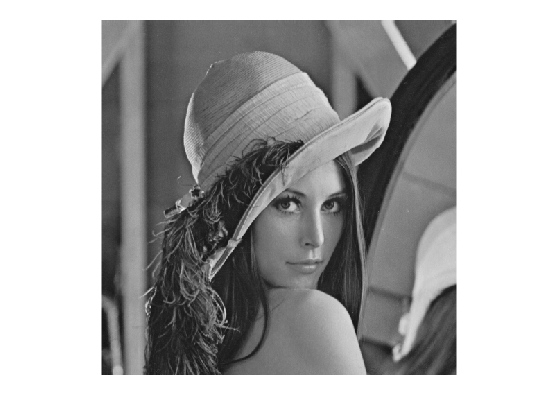

In [1]:
f = imread('lena.tif');
imshow(f)

### If another image, $g$, is subsequently displayed using `imshow`, MATLAB replaces the image in the figure window with the new image. To keep the first image and output second image, use function `figure`, as follows:

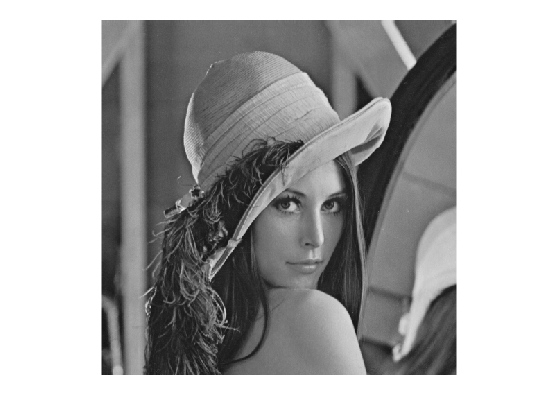

In [4]:
f = imread('lena.tif');
g = imread('moon.tif');
imshow(f)

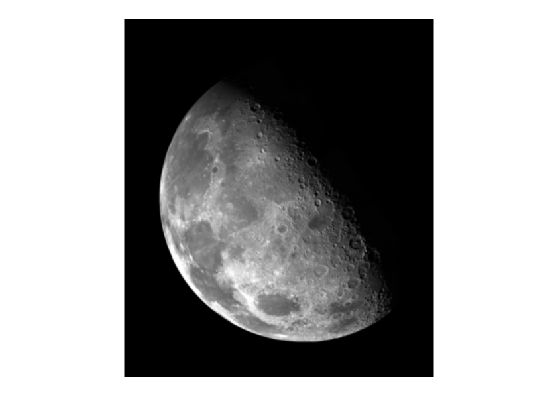

In [5]:
figure, imshow(g)

### Images are written to the *current directory* using function `imwrite`, which has the following basic syntax:

In [ ]:
imwrite(f, 'filename')

### A more general `imwrite` syntax applicable only to JPEG images is

In [ ]:
imwrite(f, 'filename.jpg', 'quality', q)

#### where $q$ is an integer between 0 and 100, the lower the number the higher the degradation due to JPEG compression.

### A more general `imwrite` syntax applicable only to **tif** images has the form

In [ ]:
imwritex(g, 'filename.tif', 'compression', 'parameter', 'resolution', [colres rowres])

#### where, $parameter$ can have one of the following principal values:
- 'none' no compression
- 'packbits' the default for nonbinary images
- 'lwz'
- 'deflate'
- 'jpeg'
- 'ccitt' binary images only; the default
- 'fax3' binary images only
- 'fax4'

#### the 1$\times$2 array [colres rowres] contains two integers that give the column resolution and resolution in dots-per-unit, the default values are [72 72]

# 1.7.7 Classes and Image Types

## 1. Gray-scale Images

#### A gray-scale image is a data matrix whose values represent shades of gray. 

#### When the elements of a gray-scale image are of class `uint8` or `uint16`, they have integer values in the range [0, 255] or [0, 65535], respectively.

#### If the image is of class `double` or `single`, the values are floating-point numbers. Values of `double` and `single` gray-scale images normally are scaled in the range [0, 1], although other ranges can be used.

## 2. Binary Images

#### A binary image is a *logical* array of 0s and 1s. Thus, an array of 0s and 1s whose values are of data class, say, `uint8`, is not considered a binary image in MATLAB.

#### A numeric array is converted to binary using function `logical`. Thus, if $A$ is a numeric array consisting of 0s and 1s, we create a logical array $B$ using the statement

In [ ]:
B = logical(A)

#### If $A$ contains elements other than 0s and 1s, the `logical` function converts all nonzero quantities to logical 1s and all entires with value 0 to logical 0s.

#### To test if an array is of class `logical` we use the `islogical` function:

In [ ]:
islogical(C)

#### If $C$ is a logical array, this function returns a 1. Otherwise it returns a 0.

#### Logical arrays can be converted to numeric arrays using the general class conversion syntax

In [ ]:
B = class_name(A)

#### where $class\_name$ is `im2uint8`, `im2uint16`, `im2double`, `im2single`, or `mat2gray`. 
#### Toolbox function `mat2gray` converts an image to an array of class double *scaled* to the range [0, 1]. The calling syntax is

In [ ]:
g = mat2gray(A, [Amin, Amax])

#### where image $g$ has values in range 0 (black) to 1 (white). The specified parameters, $Amin$ and $Amax$, are such that values less than $Amin$ in $A$ become 0 in $g$, and values greater than $Amax$ in $A$ correspond to 1 in $g$.

#### The syntax

In [ ]:
g = mat2gray(A)

#### sets the values of $Amin$ and $Amax$ to the actual minimum and maximum values in $A$. The second syntax of `mat2gray` is a very useful tool because it scales the entire range of values in the input to the range [0, 1], independently of the class of the input, thus eliminating clipping.

# 1.7.8 M-Function Programming

## 1. M-Files

### The components of a function M-file are
- The function definition line
- The H1 line
- Help text
- The function body
- Comments

### The *function definition line* has the form

In [ ]:
function [outputs] = name(inputs)

### For example, a function to compute the sum and product (two different outputs) of two images would have the form

In [ ]:
function [s, p] = sumprod(f, g)

#### where $f$ and $g$ are the input images, $s$ is the sum image, and $p$ is the product image.

### Functions can be called at the command prompt. For example,

In [ ]:
[s, p] = sumprod(f, g);

### If the output has a single argument, it is acceptable to write it without the brackets, as in

In [ ]:
y = sum(x);

## 6. Array Indexing

#### An array of dimension $1\times N$ is called a *row vector*. The elements of such a vector can be accessed using a single index value (also called a *subscript*).
#### Thus, $v(1)$ is the first element of vector $v$, $v(2)$ is its second element, and so forth.
#### Vectors can be formed in MATLAB by enclosing the elements, seprated by spaces or commas, within square brackets. For example,

In [9]:
v = [1 3 5 7 9]


v =

     1     3     5     7     9




In [10]:
v(2)


ans =

     3




#### A row vector is converted to a column vector (and vice versa) using the *transpose operator* (.'):

In [11]:
w = v.'


w =

     1
     3
     5
     7
     9




#### To access *blocks* of elements, we use MATLAB's *colon* notation. For example, to access the first three elements of $v$ we write

In [12]:
v(1:3)


ans =

     1     3     5




#### Similarly, we can access all the elements from, say, the third through the last element:

In [13]:
v(3:end)


ans =

     5     7     9




#### where $end$ signifies the last element in the vector.
#### We also can use a vector as an index into another vector, as in

In [14]:
v([1 4 5])


ans =

     1     7     9




#### Moreover, indexing is not restricted to continguous elements. For example:

In [15]:
v(1:2:end)


ans =

     1     5     9




#### where the notation *1:2:end* says to start at 1, count up by 2, and stop when the count reaches the last element.
#### Matrices can be represented conveniently in MATLAB as a sequence of row vectors enclosed by square brackets and separated by semicolons. For example,

In [10]:
A = [1 2 3; 4 5 6; 7 8 9]


A =

     1     2     3
     4     5     6
     7     8     9




#### there shows a $3\times 3$ matrix.
#### We select elements in a matrix just as we did for vectors, but now we need two indices: one to establish a row location, and the other for the corresponding column. We can also select an entire row, column, or matrix using a colon as an index:

In [11]:
A(2, :)


ans =

     4     5     6




#### Function `sum` computes the sum of each column of its argument; single-colon indexing converts $A$ to a column vector, passing the result to `sum`.

In [12]:
sum(A(:))


ans =

    45




#### Another form of indexing that you will find quite useful is *logical indexing*. A logical indexing expression has the form $A(D)$, where $A$ is an array and $D$ is a logical array of the same size as $A$. The expression $A(D)$ extracts all the elements of $A$ corresponding to the 1-valued elements of $D$. For example,

In [13]:
D = logical([1 0 0; 0 0 1; 0 0 0])


D =

  3x3 logical 数组

   1   0   0
   0   0   1
   0   0   0




In [14]:
A(D)


ans =

     1
     6




## 7. Function Handles, Cell Arrays, and Structures

#### There are two different types of function handles, both of which are created using the function handle operator @.
#### The first function handle type is the *named* (also called *simple*) *function handle*. To create a named function handle, follow the @ operator with the name of the desired function example:

In [68]:
f = @sin


f =

  包含以下值的 function_handle:

    @sin




#### Function `sin` can be called indirectly by calling the function handle, $f$:

In [70]:
f(pi / 4)


ans =

    0.7071




In [17]:
sin(pi / 4)


ans =

    0.7071




#### The second function handle type is the *anonymous function handle*, which is formed from a MATLAB expression instead of a function name. The general format for constructing an anonymous function is:

@(input-argument-list) expression

#### For example, the following anonymous function handle squares its input:

In [71]:
g = @(x) x .^ 2


g =

  包含以下值的 function_handle:

    @(x)x.^2




#### and the following handle computes the square root of the sum of two squared variables:

In [72]:
r = @(x, y) sqrt(x .^ 2 + y .^ 2)


r =

  包含以下值的 function_handle:

    @(x,y)sqrt(x.^2+y.^2)




#### Anonymous function handles can be called just like named function handles.
#### Cell arrays provide a way to combine a mixed set of objects (e.g., numbers, characters, matrices, other cell arrays) under one variable name.
#### For example, suppose that we are working with (1) an `uint8` image, $f$, of size $512\times 512$ pixels; (2) a sequence of 2-D coordinates in the form of rows if a $188\times 2$ array, $b$; and (3) a cell array containing two character names, `char_array = {'area', 'centroid'}` (curly braces are used to enclose the contents of a cell array). These three dissimilar entities can be organized into a single variable, $C$, using cell arrays:

In [22]:
f = imread('lena.tif');
b = zeros([188 2]);
char_array = {'area', 'centroid'};
C = {f, b, char_array}


C =

  1x3 cell 数组

    {512x512 uint8}    {188x2 double}    {1x2 cell}




#### In other words, the outputs shown are not the values of the various variables, but a description of some of their properties instead. To see the complete contents of an element of the cell, we enclose the numerical location of that element in curly braces. For instance, to see the contents of `char_array` we type

In [23]:
C{3}


ans =

  1x2 cell 数组

    {'area'}    {'centroid'}




#### Using parentheses instead of curly braces on an element of $C$ gives a description of the variable:

In [24]:
C(3)


ans =

  1x1 cell 数组

    {1x2 cell}




#### Finally, we point out that cell arrays contain *copies* of the arguments, not pointers to those arguements. Thus, if any of the arguments of $C$ in the preceding example were to change after $C$ was created, that change would not be reflected in $C$.

## 8. Code Optimization

#### In this section we discuss two important approaches for MATLAB code optimization: preallocating arrays and vectorizing loops.
#### *Preallocation* refers to initializing arrays before entering a `for` loop that computes the elements of the array.
#### Suppose that we want to create a MATLAB function that computes
#### $$
f(x)=\sin\frac{x}{100\pi}
$$
#### for $x=0,1,2,...,M-1$

#### The output for $M=5$ is

In [25]:
sinfun1(5)


ans =

         0    0.0032    0.0064    0.0095    0.0127




In [28]:
tic; sinfun1(100); toc

时间已过 0.000339 秒。



#### Function `timeit` can be used to obtain reliable, repeatable time measurements of function calls. The calling syntax for `timeit` is

In [ ]:
s = timeit(f)

#### where $f$ is a function handle for the function to be timed, and $s$ is the measured time, in seconds, required to call $f$.

In [36]:
M = 100;
f = @() sinfun1(M);
timeit(f)


ans =

   2.9616e-05




#### Continuting with our experiment, we use `timeit` to measure how long `sunfun1` takes for $M=500,1000,1500,...,20000$

In [ ]:
M = 500:500:20000;
for k = 1:numel(M)
    f = @() sinfun1(M(k));
    t(k) = timeit(f);
end

#### Usually, preallocation is done using a call to function `zeros`.
#### Compare the time required for `sinfun1(20000)` and `sinfun2(20000)`

In [62]:
timeit(@() sinfun1(20000))
timeit(@() sinfun2(20000))


ans =

    0.0022


ans =

   5.4995e-04




#### *Vectorization* in MATLAB refers to techniques for eliminating loops altogether, using a combination of matrix/vector operators, indexing techniques, and existing MATLAB or toolbox functions.

In [63]:
timeit(@() sinfun2(20000))
timeit(@() sinfun3(20000))


ans =

   5.5520e-04


ans =

   1.7865e-04




### Example 1.1: An illustration of vectorization, and introduction of function `meshgrid`
#### In this example, we write two versions of a MATLAB function that creates a synthetic image based on the equation:
#### $$
f(x,y)=A\sin(u_0x+v_0y)
$$

#### Observe the preallocation step, `f=zeros(M, N)`, before the `for` loops. We use `timeit` to see how long this fucntion takes to create a simusoidal image of size $512\times 512$ pixels:

In [19]:
timeit(@() twodsin1(1, 1 / (4 * pi), 1 / (4 * pi), 512, 512))


ans =

    0.0071




#### Without preallocation, this function would run approximately 42 times slower.
#### We can display the resulting image using the auto-range syntax ([]) of `imshow`:

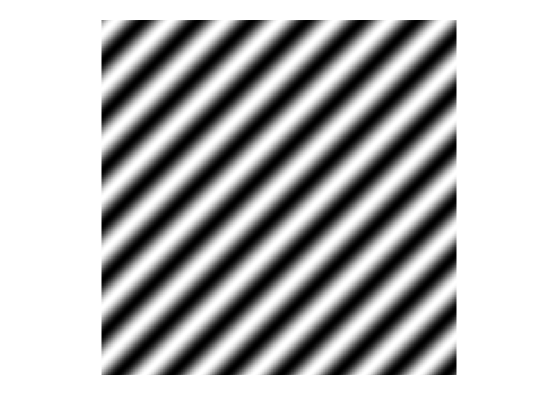

In [21]:
f = twodsin1(1, 1/(4*pi), 1/(4*pi), 512, 512);
imshow(f, [ ])

#### In our second version of the function, we vectorize it (that is, we rewrite it without using `for` loops) by using a very useful MATLAB function called `mersgrid`, with syntax

In [ ]:
[C, R] = meshgrid(c, r)

#### The input arguments $c$ and $r$ are vectors of horizontal (column) and vertical (row) coordinates, respectively (note that columns are listed *first*). Function `meshgrid` transforms the coordinate vectors into two arrays $C$ and $R$ that can be used to compute a function of two variables.
#### For example, the following commands use `meshgrid` to evaluate the function $z=x+y$ for integer values of $x$ ranging from 1 to 3, and for integer values of $y$ ranging from 10 to 14:

In [22]:
[X, Y] = meshgrid(1:3, 10:14)


X =

     1     2     3
     1     2     3
     1     2     3
     1     2     3
     1     2     3


Y =

    10    10    10
    11    11    11
    12    12    12
    13    13    13
    14    14    14




In [23]:
Z = X + Y


Z =

    11    12    13
    12    13    14
    13    14    15
    14    15    16
    15    16    17




#### Finally, we use `meshgrid` to rewrite the 2-D sine function without loops:
#### As before, we use `timeit` to measure its speed:

In [20]:
timeit(@() twodsin2(1, 1 / (4 * pi), 1 / (4 * pi), 512, 512))


ans =

    0.0038




#### The vectorized version takes roughly 50% less time to run.